# Find Patterns Visually Using Seaborn

In [16]:
%matplotlib inline

This notebook uses two fictitious datasets that can be used to
serve as a templates to solve requirements often found in 
scientific or business applications. *ALL* of the data is completely
made up and does not represent any plants or animals, living or otherwise.

___
**Magic Bean Production Analysis**
The bean dataset simulates laboratory conditions to measure the
changes throught the growing season.  The sample column is the order 
in which the daily specimens were processed, the day column
represents 45 days from first flowering of the plant and begin of
harvest. It was determined that 180 samples per day were adequate,
the color caterory is based on observations from a standardized
chart to track how the fruit changes from unripe yellow to dark 
purple for overripened (Y0, YP, P0, PP, PB).  Fruits that are damaged 
or otherwise unmarketable are denoted as 0X. 

The bean volume (ml) and weight (mg) are recorded, the mass is
not calculated, We will create a new column for these values and 
graph that instead of the two individual values. The fiber and
terpene columns simulate measurements of a primary and secondary
component found within the fruit. The terpene measuring device
is only accurate to 3 digits, the primary is always in the 100s
while the secondary never goes over 1. 


___
**Entognatha Scanner Report**
This is just a list of families of the three orders of animals known
as the _Entognathous_ hexapods. They represent a primitive form of insect
that is distinguished from others by their mouthparts that are mostly
withdrawn into the head. Manton (1977) concluded that these three
groups evolved the hexapodous condition independently and should be
organized into their own class. This list is based on Boudreaux (1979) and
Kristensen (1981) which places these animals in a class separate from Insecta.

Anything could be used in the family column, I just picked these orders 
to use as a example categorical dataset. Replace the family with anything 
that is measuring the duration of each step in a sequence.

In this practice scenario, the set is measuring how long an autonomous bot 
took to process each family in the sequence. 
When it begins its weekly processing job, it sends a livefeed to the nearest 
wireless receiver. Due to the high impact of the weekly measurement a human 
operator monitors the progress of the scan protocol.
If a process is taking longer than average, it could mean that the operator
needs to perform a simple physical manipulation to ensure the total process
completes within the required time frame. 

The data from the bot ultimately feeds to a desktop in the control center.
We are not able to change the output, but we can select into the clipboard.
This will be the active or current dataframe which will be clearly displayed
against the historical dataframe.  I have different examples of active data
to simulate normal and abnormal events occuring in real time.

The specimen_damaged and error_data represents a validation check that also is 
performed after the scan of the family is completed, values above 15 trigger an
arial drone to fly to the bot and perform visual scans along with detailed
weather information. Anything under 15 can be ignored and skipped 
until the bot returns to the control center with the specimens. 



In [2]:
import seaborn as sns
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
from numpy import float64, int64

In [3]:
#names = ["sample", "day", "bean_vol", "bean_mg"]
#bean_data = pd.read_csv('./data/raw/bean_data_2021.csv', names=names)                
bean_data = pd.read_csv('../data/raw/bean_data_2021.csv', header=0, index_col=["sample"])                
                        

In [4]:
bean_data.head(50)

day  bean_vol  bean_mg color_cat  fiber_alpha  fiber_beta  terpene1  \
sample                                                                        
1         1     0.169     3.61        Y0           54          35       290   
2         1     0.297     4.80        YP           62          46       388   
3         1     0.263     2.28        YP           63          22       301   
4         1     0.180     2.20        YP           55          27       269   
5         1     0.122     2.89        YP           58          22       428   
6         1     0.257     4.40        YP           51          32       348   
7         1     0.213     5.23        YP           55          49       280   
8         1     0.158     4.95        YP           60          49       337   
9         1     0.282     2.13        YP           50          25       236   
10        1     0.238     4.29        YP           44          23       389   
11        1     0.117     2.54        YP           60          22       439   
12        1     0.302     4.78        YP           50          48       302   
13        1     0.184     3.29        YP           48          50       293   
14        1     0.208     2.29        YP           61          26       448   
15        1     0.163     3.46        YP           53          26       399   
16        1     0.192     4.27        YP           64          47       287   
17        1     0.171     4.77        YP           64          34       261   
18        1     0.303     1.61        YP           62          32       402   
19        1     0.170     3.76        YP           46          45       288   
20        1     0.191     4.27        YP           60          46       364   
21        1     0.124     2.50        YP           47          47       237   
22        1     0.120     3.99        YP           59          46       307   
23        1     0.248     3.45        YP           44          38       324   
24        1     0.120     1.81        YP           51          39       263   
25        1     0.118     3.29        Y0           45          40       440   
26        1     0.321     2.00        YP           56          29       243   
27        1     0.317     3.93        YP           44          21       307   
28        1     0.185     3.94        YP           63          23       281   
29        1     0.151     1.64        YP           61          39       320   
30        1     0.178     4.69        YP           65          33       383   
31        1     0.144     2.59        YP           51          30       253   
32        1     0.322     2.85        YP           64          50       414   
33        1     0.244     3.00        YP           54          48       295   
34        1     0.128     4.79        YP           62          31       329   
35        1     0.315     3.02        YP           55          40       333   
36        2     0.204     3.28        YP           65          25       234   
37        2     0.162     2.88        YP           54          51       432   
38        2     0.120     4.71        YP           60          49       359   
39        2     0.141     2.01        YP           62          51       331   
40        2     0.200     4.55        YP           59          42       315   
41        2     0.160     1.71        YP           56          40       241   
42        2     0.255     1.96        YP           50          51       234   
43        2     0.166     2.58        YP           48          35       374   
44        2     0.222     1.80        YP           58          25       296   
45        2     0.161     3.37        YP           59          42       286   
46        2     0.313     2.64        YP           66          27       430   
47        2     0.323     4.15        YP           57          29       281   
48        2     0.316     1.91        YP           66          40       455   
49        2     0.211     5.29        YP           66     

In [ ]:
bean_data = pd.read_csv('../data/raw/bean_data_2021.csv', 
                        header=0,
                        index_col=["sample"])

In [5]:
#verify if your object is in fact a pandas.core.frame.DataFrame
type(bean_data)

pandas.core.frame.DataFrame

In [ ]:
bean_data.info()

## Countplot categorical data

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

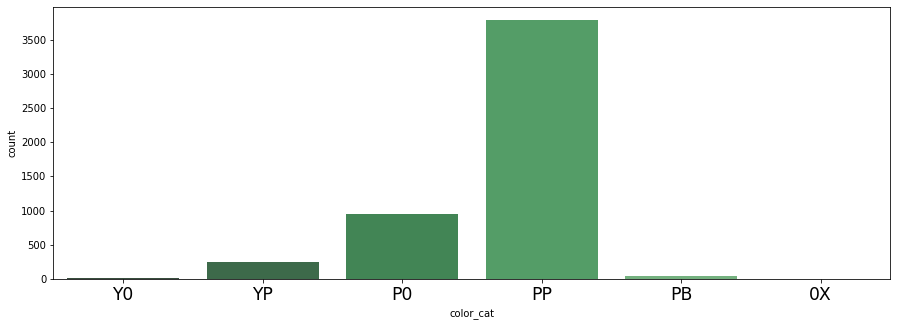

In [10]:
f,ax=plt.subplots(figsize=(15,5))

sns.countplot(x='color_cat', data=bean_data, palette="Greens_d")

plt.xticks(rotation=0, size="xx-large") 

The output above should show zero nulls, and auto detect the float and int64 columns.

Lets begin to explore the magic bean practice only dataset.
How does the fruiting body change over the course of the production season?

## Distplot function for Univariate Distribution
Distributions that varies randomnly with respect to one variable.
Plot univariate distribution of elements of a single column using distplot function.

Draw a histogram and show the kernel density estimate for each feature. There should be a noticable change in each one throughout the season.

*The kernel density estimate is a non-parametric way to estimate the probability density function of a random variable. To draw this curve, each observation is replaced with a Gaussian curve centred at that value. Then all such curves are summed, the value of density at each point is computed and the resulting curve is normalized.*

*A histogram is a diagram consisting of rectangles whose area is proportional to the frequency of a variable and whose width is equal to the class interval.*

In [ ]:
#sns.distplot(bean_data['bean_vol'])
#sns.distplot(bean_data['bean_mg'])
#sns.distplot(bean_data['color_cat'])
#sns.distplot(bean_data['fiber_alpha'])
sns.distplot(bean_data['fiber_beta'])
#sns.distplot(bean_data['terpene1'])
#sns.distplot(bean_data['terpene2'])


*Examine the values in each column individually to determine if it is random or has some sort of pattern. All of the values should change slightly over the season.*

Create a histogram without the default Kernel density estimation curve.

Seaborn uses the Freedman-Diaconis rule when it chooses the bin number.
Depending on the variance of each column, you may need to make small changes to the number of bins to make patterns stand out.
The higher the number, the smaller is the width of each bin, which translates to more details on individual data points.

In [ ]:
#First build a figure and display the plot.
#figsize params denote the lengths of the box alloted for the plot
f, ax = plt.subplots(figsize=(15,5))

sns.distplot(bean_data['bean_vol'], kde=False);

From the graph of the bean volume, we see that a lot of our values fall between approximately 0.25 and 0.45 mL. 
In the next cell add a rug plot to the bottom.

In [ ]:
f,ax=plt.subplots(figsize=(15,5))

sns.distplot(bean_data['bean_mg'], kde=False, rug=True);

If there appears to be groups in the rub plot, create a graph of it separately.

In [ ]:
f,ax=plt.subplots(figsize=(15,5))

sns.rugplot(bean_data['bean_mg'], height=0.5, axis='x')

####Use histograms to look the distribution of data for each feature.
Are there patterns between the features that show some sort of correlation that could warrent further research into possible causation. 



In [ ]:
f,ax=plt.subplots(figsize=(15,5))

sns.distplot(bean_data['bean_vol'], bins=30, kde=False, rug=True);

In [ ]:
f,ax=plt.subplots(figsize=(15,5))

sns.distplot(bean_data['terpene1'], bins=75, kde=False, rug=True);

Increase the number of bins for terpene1, it will show two spikes around 450 and 750.

#### Univariate Kernel Density Estimation KDE

Show just the kernel density estimation, which gives the shape of the distribution

The next examples use terpene1 levels in the bean data frame. 

Distplot is empty with the rug plot at the bottom which should be solid.

The second example uses the kdeplot function and shades everything under the curve. Column name should appear as a legend with one value.



In [ ]:
f,ax=plt.subplots(figsize=(15,5))

sns.distplot(bean_data['terpene1'], hist=False, rug=True);

In [ ]:
f,ax=plt.subplots(figsize=(15,5))

sns.set(color_codes=True)        #enable to use parameters below
                                 #fill in the color green below the line 
sns.kdeplot(bean_data['terpene1'],shade=True, color="g")

We know that the curve drawn from the points in a graph depends on 
* the accuracy of the points in the plot
* the number of data points chosen

Let us verify the same by plotting curves with different bandwidths controls too low and data is crowded, to high and its flattend out.
notice that earlier plot chose 0.2

In [ ]:
f,ax=plt.subplots(figsize=(15,5))

#Curve accuracy increases with smaller bandwith parameters
#Data points will be crowded if too small however
#Seaborn defaults will often be very close
#control how close the estimation is fit to the data using the bw parameter
sns.kdeplot(bean_data['terpene1'])
sns.kdeplot(bean_data['terpene1'], bw=.04, label="bw: 0.04")
sns.kdeplot(bean_data['terpene1'], bw=.2, label="bw: 0.2")
sns.kdeplot(bean_data['terpene1'], bw=2, label="bw: 2")
sns.kdeplot(bean_data['terpene1'], bw=5, label="bw: 5")

## Bivariate Distributions
Here we want to compare some variables to each other within the dataset.
For distributions which vary randomly in two variables : 

jointplot() function is useful for plotting two variables in a single graph.

Use graphs to detect relationships between the alpha and beta values in fiber and terpenes. 

Create a scatter plot using two features at a time to visualize the distribution.
The mg hit a wall at 6 and volume mostly maxes out at 0.5

In [ ]:
sns.jointplot(x='bean_vol', y='bean_mg', data=bean_data)

In [ ]:
#Add x and y limits to the plot to see the outliers in the top right better
sns.jointplot(x='bean_vol', y='bean_mg', data=bean_data,
              xlim={0, 0.7}, ylim={0,8})

In [ ]:
#Hexbin plot, the bivariate analogue of a histogram in high contrast mode
#use a white background with a grid to make it more visible
with sns.axes_style('whitegrid'):
    sns.jointplot(x='terpene1', y='terpene2', data=bean_data, 
                  kind='hex',color='k'),
                  #xlim={0,1100}, ylim={0,0.60})

The plot of relationship between the terpenes shows that there is a verticle line and no trend.  The values in terpene2 show a lot of average values, and terpene1 has a spike around 600. This would indicate that thease features are occuring independently of each other.  Next compare the fiber values to each other.

In [ ]:
with sns.axes_style('whitegrid'):
    sns.jointplot(x='fiber_alpha', y='fiber_beta', data=bean_data, 
                  kind='hex',color='k') #,
                  #xlim={0,1100}, ylim={0,0.60})

#### Kernel Density Distribution 

How about Kernel density estimation for bivariate distributions? What happens to the curve?


In [ ]:
sns.jointplot(x='terpene1', y='terpene2', data=bean_data, 
              kind="ns.set_theme(style="ticks")

exercise = sns.load_dataset("exercise")

g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise)kde") #,
              #xlim={0,1000}, ylim={0,0.50})

In [ ]:
sns.jointplot(x='fiber_alpha', y='terpene2', data=bean_data, 
              kind="kde")
#the fiber_alpha and terpene2 values appear to change at the same rate

In [ ]:
sns.jointplot(x='fiber_beta', y='terpene1', data=bean_data, 
              kind="kde")

In [ ]:
# The clip parameters clips the plot to the specified limits
#terpene1 maxes out around 900 so see the top limit better
sns.kdeplot(bean_data['terpene1'], bean_data['terpene2'], clip=(0,1000))
#optionally use matplotlib to set the xy limits
plt.xlim(0,1100)
plt.ylim(0,0.50)
#The color gradient differentiates the peaks of both the concentrations
#View the bivariate histogram as layers and curves

In [ ]:
#setting the size for the plot
f,ax=plt.subplots(figsize=(8,5))
#f,ax=plt.subplots(figsize=(10,5))

sns.kdeplot(bean_data['terpene1'], bean_data['terpene2'], clip=(0,1000), n_levels=25)
#change the number of levels between the contours

#adding rug plots to the above
#The vertical tag is used to plot the rug lines along x axis for Total Sulfur Dioxide
sns.rugplot(bean_data['terpene1'], color="g", height=0.05)
sns.rugplot(bean_data['terpene2'], vertical=True, height=0.05);

#Setting limits to the x and y axes
plt.xlim(0,1100)
plt.ylim(0,0.50)

#### Bivariate KED

View distribution as a single continuous region with different color gradients.



In [ ]:
#View the plot as a single continuous region using different color gradients
#setting the size for the plot
f,ax=plt.subplots(figsize=(10,5))

cmap = sns.cubehelix_palette(as_cmap=True, dark=1, light=0, reverse=True)
sns.kdeplot(bean_data['terpene1'], bean_data['terpene2'], clip=(0,1000), n_levels=25,
            cmap=cmap, shade=True)
#The number of contour levels have been increased, and the cubehelix colour palette is used

plt.xlim(0,1100)
plt.ylim(0,0.50)

The regions with high concentration (=1) are marked as dark, while those with lesser concentration are marked as light. We get a single graph where the distinction between curves is not evident.

**Note: You can use the jointgrid() function also (which is used by jointplot() to plot your graphs), to create further visual effects like adding markers, more layers, etc.**

Let's try to see what else we can find from the dataset. 

## Plotting Pairwise Relationships

From Ravi:"
Seaborn provides a pairplot() function. This creates a matrix of axes and shows the relationship between every pair of columns in the dataframe.

A quick way to see all of these relationships in one go, plot bivariate relationships between every pair of columns in a dataset. 

The result of a pair plot is a matrix grid of plots with every possible combination of columns on the X and the Y axes.

Diagonal is made of plots that are histograms of the univariate variables.

The row categories form the Y variables, and the column categories form the X variables. 
"

In [ ]:
import seaborn as sns
import pandas as pd
print("Seaborn verion = " + sns.__version__)
print("Pandas version = " + pd.__version__)
verified 

In [ ]:
sns.pairplot(bean_data, height=3)

Create a matrix of graphs, all the column titles are the rows and columns of the matrix.
Default principal diagonals are a histogram of univariate distribution plots of the same quantity on both X and Y axes. The rest of the entries have different quantities along the X and Y axes, creating scatter plots of the bivariate distribution.

Some data may display better with a KDE line instead of bar graphs.



In [ ]:
sns.pairplot(bean_data, size=3, 
             vars=["terpene1","terpene2","fiber_alpha","fiber_beta"], diag_kind="kde")
#histogram if you do not specify the diagonal

In [ ]:
sns.pairplot(bean_data, height=3, 
             vars=["terpene1","terpene2","fiber_alpha","fiber_beta"])#,
             #kind='reg')
#Making kind as reg (By default, it is scatter)

In [ ]:
sns.pairplot(bean_data, 
             vars=["terpene1","terpene2","fiber_alpha","fiber_beta"],
             hue="day", diag_kind='kde')

**Heatmaps with Seaborn**
Use the seaborn.heatmap() function. You may first need to find the correlation between variables. 
Pass the function data.corr() into the heatmap function.

In [ ]:
corrmat = bean_data.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = "summer")
plt.show()

In [ ]:
sns.jointplot(x='fiber_beta', y='bean_mg', data=bean_data)

## Fine tuning of individual plots

### Line Plots

In [ ]:
plt.close('all')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### Bar Plots

In [ ]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [ ]:
np.random.seed(12348)

In [ ]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar()

In [ ]:
df.plot.barh(stacked=True, alpha=0.5)

In [ ]:
plt.close('all')

In [ ]:
tips = pd.read_csv('../data/raw/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

In [ ]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

In [ ]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
party_pcts.plot.bar()


In [ ]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [ ]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [ ]:
plt.close('all')

### Histograms and Density Plots

In [ ]:
plt.figure()

In [ ]:
tips['tip_pct'].plot.hist(bins=50)

In [ ]:
tips['tip_pct'].plot.density()

In [ ]:
plt.figure

In [ ]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

In [ ]:
beano = pd.read_csv('../data/raw/bean_data_2021.csv',
                   header=0)#, index_col=['sample'])
data = beano[['sample', 'bean_vol', 'bean_mg', 'terpene1']]
#trans_data = np.log(data).diff().dropna()
trans_data = data.diff().dropna()


In [ ]:
plt.figure()

In [ ]:
#look at the bottom of the dataframe
trans_data[-5:]

### Facet Grids and Categorical Data

First 

In [ ]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

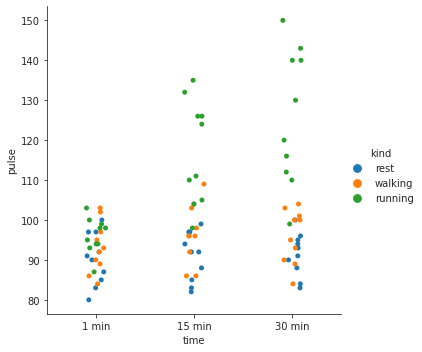

In [8]:
sns.set_style(style="ticks")

exercise = sns.load_dataset("exercise")

g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise)

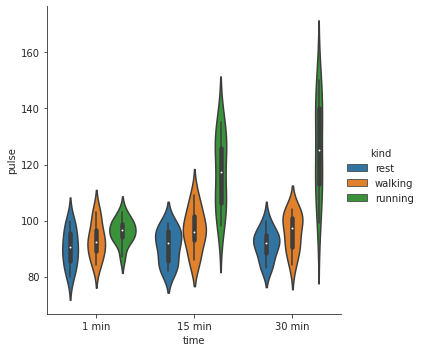

In [9]:
g = sns.catplot(x="time", y="pulse", hue="kind",

               data=exercise, kind="violin")


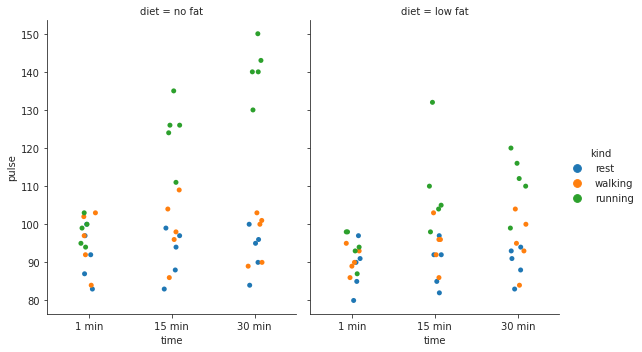

In [12]:
g = sns.catplot(x="time", y="pulse", hue="kind",
                col="diet", data=exercise,
                height=5, aspect=0.8)

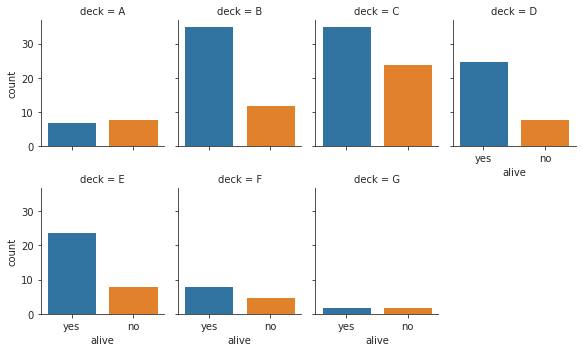

In [13]:
titanic = sns.load_dataset("titanic")

g = sns.catplot(x="alive", col="deck", col_wrap=4,

                data=titanic[titanic.deck.notnull()],

                kind="count", height=2.5, aspect=.8)

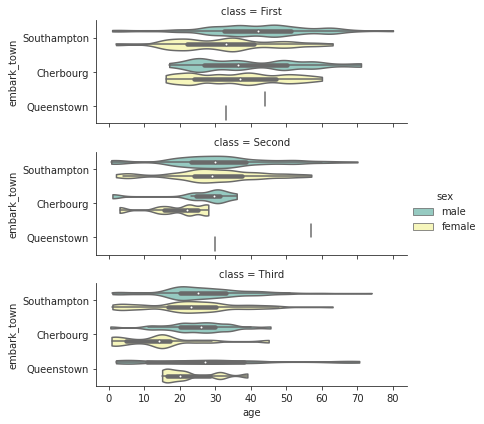

In [14]:
g = sns.catplot(x="age", y="embark_town",

                hue="sex", row="class",

                data=titanic[titanic.embark_town.notnull()],

                orient="h", height=2, aspect=3, palette="Set3",

                kind="violin", dodge=True, cut=0, bw=.2)


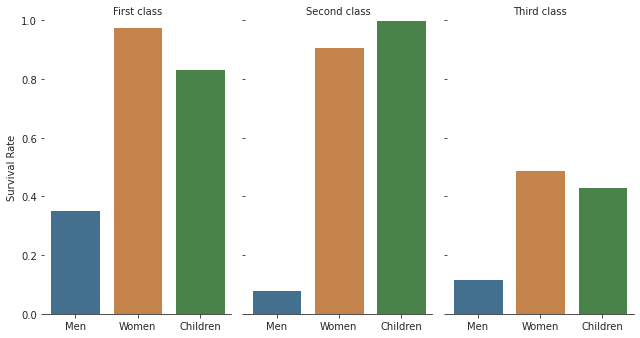

In [15]:
g = sns.catplot(x="who", y="survived", col="class",

                data=titanic, saturation=.5,

                kind="bar", ci=None, aspect=.6)

(g.set_axis_labels("", "Survival Rate")

  .set_xticklabels(["Men", "Women", "Children"])

  .set_titles("{col_name} {col_var}")

  .set(ylim=(0, 1))

  .despine(left=True))  

## Work in progress